In [1]:
# Logistic Regression

In [2]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix


In [3]:
cd Desktop/ExerciseFiles/Data

/Users/aodubela/Desktop/ExerciseFiles/Data


In [4]:
# Load Cryotherapy Data

cryo = pd.read_csv("Cryotherapy.csv", sep = ',', header = 0)

In [5]:
cryo.head()

sex  age   Time  Number_of_Warts  Type  Area  Result_of_Treatment
0    1   35  12.00                5     1   100                    0
1    1   29   7.00                5     1    96                    1
2    1   50   8.00                1     3   132                    0
3    1   32  11.75                7     3   750                    0
4    1   67   9.25                1     1    42                    0

In [6]:
cryo.describe()

sex        age       Time  Number_of_Warts       Type  \
count  90.000000  90.000000  90.000000        90.000000  90.000000   
mean    1.477778  28.600000   7.666667         5.511111   1.700000   
std     0.502304  13.360852   3.406661         3.567155   0.905042   
min     1.000000  15.000000   0.250000         1.000000   1.000000   
25%     1.000000  18.000000   4.562500         2.000000   1.000000   
50%     1.000000  25.500000   8.500000         5.000000   1.000000   
75%     2.000000  35.000000  10.687500         8.000000   3.000000   
max     2.000000  67.000000  12.000000        12.000000   3.000000   

             Area  Result_of_Treatment  
count   90.000000            90.000000  
mean    85.833333             0.533333  
std    131.733153             0.501683  
min      4.000000             0.000000  
25%     20.000000             0.000000  
50%     70.000000             1.000000  
75%    100.000000             1.000000  
max    750.000000             1.000000

In [7]:
# Check for missing data
total = cryo.isnull().sum().sort_values(ascending=False)
print(total)

Result_of_Treatment    0
Area                   0
Type                   0
Number_of_Warts        0
Time                   0
age                    0
sex                    0
dtype: int64


In [8]:
print(cryo.shape)

(90, 7)


In [9]:
cryo.drop(cryo.columns[[0,1,2]], axis = 1, inplace = True)

In [10]:
cryo.head()

Number_of_Warts  Type  Area  Result_of_Treatment
0                5     1   100                    0
1                5     1    96                    1
2                1     3   132                    0
3                7     3   750                    0
4                1     1    42                    0

In [11]:
# Creating Array of Features
X = cryo.iloc[:,:3]
X.head()

Number_of_Warts  Type  Area
0                5     1   100
1                5     1    96
2                1     3   132
3                7     3   750
4                1     1    42

In [12]:
# Create Target Array
Y = cryo.iloc[:,-1]
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: Result_of_Treatment, dtype: int64

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=23)

In [15]:
# Create Logistic Regression Classifier
classifier = LogisticRegression(solver='lbfgs',random_state=234)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# Fit Classifier on Cryotherapy Data
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# Testing Classifier with our remainign data
predicted_y = classifier.predict(X_test)
print(predicted_y)

[1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0]


In [18]:
# View patients who will probably respond positibvely to cryotherapy

for x in range(len(predicted_y)):
    if (predicted_y[x] == 1):
        print(x)

0
2
4
6
8
10
11
13
14
15
16
17
19
20
22
23
24
26
27
29
30
31
32
33
34


In [19]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

Accuracy: 0.69


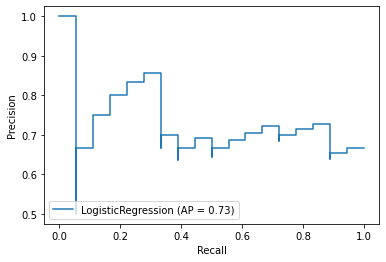

In [20]:
plot_precision_recall_curve(classifier, X_test, Y_test)


In [21]:
# View Metrics
print('Accuracy = {:.5f}'.format(accuracy_score(Y_test, predicted_y)))
print('Precision = {:.5f}'.format(precision_score(Y_test, predicted_y)))
print('Recall = {:.5f}'.format(recall_score(Y_test, predicted_y)))
print('F1 score = {:.5f}'.format(f1_score(Y_test, predicted_y)))

print('\nClassification Report')
print(classification_report(Y_test, predicted_y))

Accuracy = 0.69444
Precision = 0.64000
Recall = 0.88889
F1 score = 0.74419

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.50      0.62        18
           1       0.64      0.89      0.74        18

    accuracy                           0.69        36
   macro avg       0.73      0.69      0.68        36
weighted avg       0.73      0.69      0.68        36



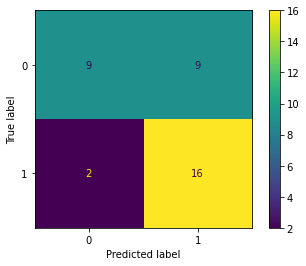

In [22]:
# Print Confusion Matrix

plot_confusion_matrix(classifier, X_test, Y_test)